In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [62]:
path = "../data/coffee/total-production.csv"

coffee_production = pd.read_csv(path,index_col='total_production').T

# Coffee Production Stats

* Create a bar chart of the top 10 coffee producers by total production in 'total-production.csv', sorted from highest to lowest. Change the xticks to two letter country abbreviations.


* Data Prep Code

<mark style="background-color: #000000"> coffee_production = pd.read_csv("coffee/total-production.csv").T </mark> 

<mark style="background-color: #000000"> coffee_production.columns = coffee_production.iloc[0] </mark> 

<mark style="background-color: #000000"> coffee_production = coffee_production.drop("total_production") </mark> 


In [63]:
coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.870,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.520,120.235,34603.3542,620.238,1185.480,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.790,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.0470,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


In [64]:
coffee_production.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 1990 to 2018
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Angola                            29 non-null     float64
 1   Bolivia (Plurinational State of)  29 non-null     float64
 2   Brazil                            29 non-null     float64
 3   Burundi                           29 non-null     float64
 4   Ecuador                           29 non-null     float64
 5   Indonesia                         29 non-null     float64
 6   Madagascar                        29 non-null     float64
 7   Malawi                            29 non-null     float64
 8   Papua New Guinea                  29 non-null     float64
 9   Paraguay                          29 non-null     float64
 10  Peru                              29 non-null     float64
 11  Rwanda                            29 non-null     float64
 12  Timor-Lest

In [65]:
top10_producers = coffee_production.sum().sort_values(ascending=False).head(10)

top10_producers

total_production
Brazil       1.190966e+06
Viet Nam     4.395410e+05
Colombia     3.458714e+05
Indonesia    2.451168e+05
Ethiopia     1.415429e+05
India        1.320257e+05
Mexico       1.269082e+05
Guatemala    1.134011e+05
Honduras     1.054566e+05
Uganda       9.314637e+04
dtype: float64

In [66]:
top10_producers.index

Index(['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia', 'India',
       'Mexico', 'Guatemala', 'Honduras', 'Uganda'],
      dtype='object', name='total_production')

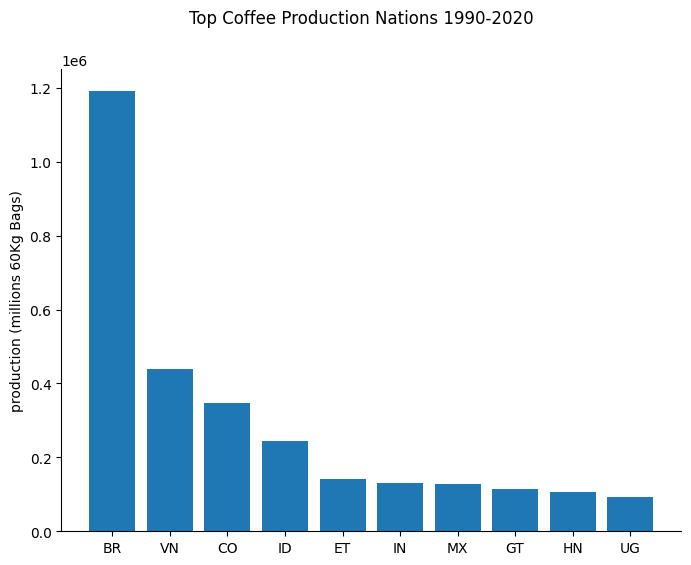

In [67]:
fig ,ax = plt.subplots(figsize = (8,6))
ax.bar(
    ['BR', 'VN', 'CO', 'ID', 'ET', 'IN', 'MX', 'GT', 'HN', 'UG'],
    top10_producers
)
fig.suptitle("Top Coffee Production Nations 1990-2020")
ax.set_ylabel("production (millions 60Kg Bags)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Top 5 over time

* Create a line chart with the top 5 nations over time. Make sure to include a legend! Consider converting the index to datetime64[ns].

In [68]:
top5 = coffee_production[top10_producers.index[:5]]
top5.index = pd.date_range(start='1990', periods=len(top5), freq='Y')
top5.head()

total_production,Brazil,Viet Nam,Colombia,Indonesia,Ethiopia
1990-12-31,27285.6286,1310.288,14396.000,7441.383,2909.451
1991-12-31,27293.4934,1437.848,17980.397,8493.196,2924.664
1992-12-31,34603.3542,2340.447,14946.878,5569.478,1825.171
1993-12-31,28166.9786,3020.216,11422.422,6743.288,2967.004
1994-12-31,28192.0470,3631.609,12964.000,5367.878,2762.730


Text(0, 0.5, 'production (Thousand 60Kg Bages)')

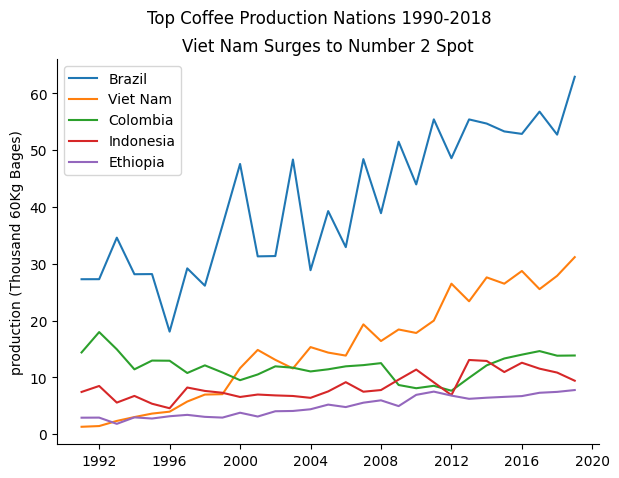

In [69]:
fig , ax = plt.subplots(figsize = (7,5))
for i in top5.columns:
    ax.plot(
        top5.index,
        top5[i]/1000
    )
ax.legend(top5.columns)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.suptitle("Top Coffee Production Nations 1990-2018")
ax.set_title("Viet Nam Surges to Number 2 Spot")
ax.set_ylabel("production (Thousand 60Kg Bages)")

# COMPOSITION OVER TIME

Our client is interested in looking at how Brazil's share of global coffee production has changed over time.

Build a plot that global total production as well as Brazil's contribution to global production over time.

In [70]:
top5['rest_of_world'] = top5['Viet Nam']+top5['Colombia']+top5['Indonesia']+top5['Ethiopia']
brazil_vs_others = top5[['Brazil','rest_of_world']]
brazil_vs_others.head()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_13592\650731928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5['rest_of_world'] = top5['Viet Nam']+top5['Colombia']+top5['Indonesia']+top5['Ethiopia']


total_production,Brazil,rest_of_world
1990-12-31,27285.6286,26057.122
1991-12-31,27293.4934,30836.105
1992-12-31,34603.3542,24681.974
1993-12-31,28166.9786,24152.930
1994-12-31,28192.0470,24726.217


Text(0.5, 1.0, 'Brazil Increases share of Growing Market')

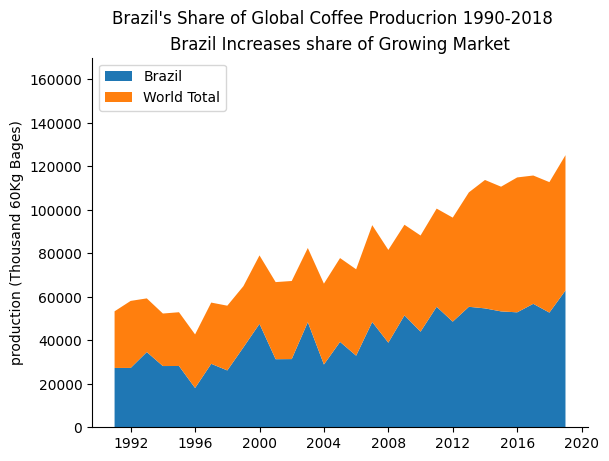

In [71]:
fig,ax = plt.subplots()
ax.stackplot(
    brazil_vs_others.index,
    brazil_vs_others['Brazil'],
    brazil_vs_others['rest_of_world']
)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0,170000)
ax.legend(['Brazil','World Total'], loc = 'upper left')
ax.set_ylabel("production (Thousand 60Kg Bages)")
fig.suptitle("Brazil's Share of Global Coffee Producrion 1990-2018")
ax.set_title("Brazil Increases share of Growing Market")

## PRODUCTION RELATIONSHIPS

We want to explore how Brazil compares to its competitors in terms of production. Build a scatterplot  comparing Brazil Vs. VietNam Production and one comparing Brazil to Venezuela.

Text(0, 0.5, 'Venezuela Production (Millions 60Kg Bags)')

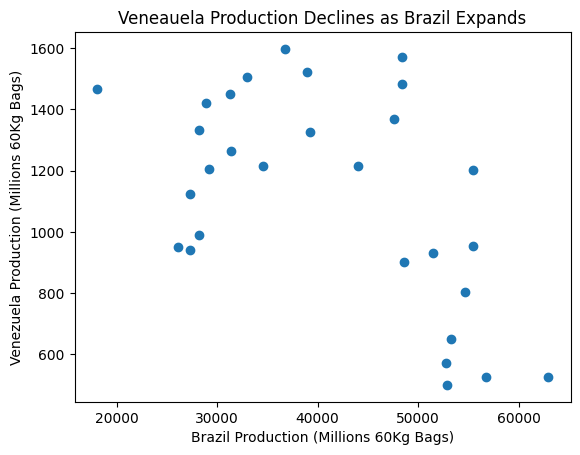

In [72]:
fig ,ax = plt.subplots()
ax.scatter(
    coffee_production['Brazil'],
    coffee_production['Venezuela']
)
ax.set_title("Veneauela Production Declines as Brazil Expands")
ax.set_xlabel("Brazil Production (Millions 60Kg Bags)")
ax.set_ylabel("Venezuela Production (Millions 60Kg Bags)")

Text(0, 0.5, 'VietNam Production (Millions 60Kg Bags)')

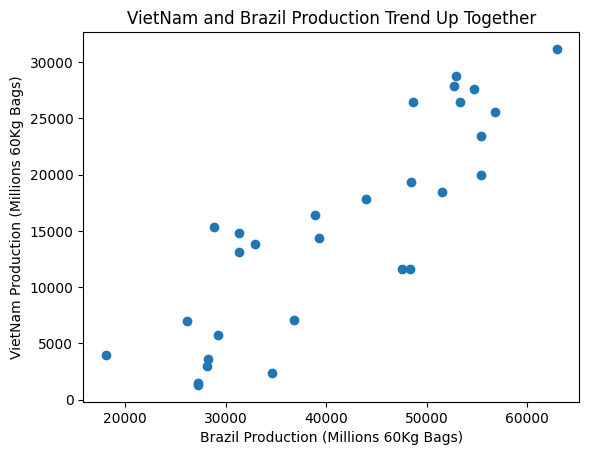

In [73]:
fig ,ax = plt.subplots()
ax.scatter(
    coffee_production['Brazil'],
    coffee_production['Viet Nam']
)
ax.set_title("VietNam and Brazil Production Trend Up Together")
ax.set_xlabel("Brazil Production (Millions 60Kg Bags)")
ax.set_ylabel("VietNam Production (Millions 60Kg Bags)")

# COMPOSITION OF COFFEE PRODUCTION

* Create a Pie chart with the top 5 producers, as well as the sum for the rest of countries.

* Finally, create two donut charts, one representing Brazil's share of global production in 1990, and one for Brazil's share in 2018.

In [74]:
Rest_of_World = 0
for i in coffee_production.columns:
    Rest_of_World += coffee_production.loc['2018'][i]
Rest_of_World

170936.73769999997

In [75]:
coffee_production_top5_2018 = coffee_production.loc['2018'].sort_values(ascending=False).head()
for i in coffee_production_top5_2018.index:
    Rest_of_World -= coffee_production_top5_2018[i]
coffee_production_top5_2018['Rest of World'] = Rest_of_World

In [76]:
coffee_production_top5_2018

total_production
Brazil           62924.8836
Viet Nam         31174.0742
Colombia         13857.9620
Indonesia         9417.5942
Ethiopia          7776.2234
Rest of World    45786.0003
Name: 2018, dtype: float64

Text(0.5, 1.0, 'Share of Global Coffee Production 2018')

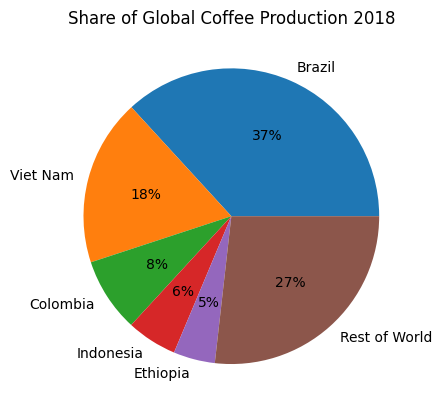

In [77]:
fig , ax = plt.subplots()
ax.pie(
    coffee_production_top5_2018,
    labels=coffee_production_top5_2018.index,
    autopct='%.0f%%'
)
ax.set_title("Share of Global Coffee Production 2018")

In [78]:
brazil_vs_all = coffee_production['Brazil']
brazil_vs_all = pd.DataFrame(brazil_vs_all)
brazil_vs_all

,Brazil
1990,27285.6286
1991,27293.4934
1992,34603.3542
1993,28166.9786
1994,28192.0470
1995,18060.2022
1996,29196.7430
1997,26148.0040
1998,36760.8533
1999,47577.8065


In [79]:
all = 0
for i in coffee_production.columns:
    all += coffee_production[i]
brazil_vs_all['rest_of_world'] = all-coffee_production['Brazil']
brazil_vs_all.head()

,Brazil,rest_of_world
1990,27285.6286,65944.431
1991,27293.4934,73973.191
1992,34603.3542,63922.545
1993,28166.9786,63597.643
1994,28192.0470,65121.147


In [80]:
brazil_vs_all = brazil_vs_all.T
brazil_vs_all

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Brazil,27285.6286,27293.4934,34603.3542,28166.9786,28192.047,18060.2022,29196.743,26148.004,36760.8533,47577.8065,...,43976.8120,55428.4102,48591.8289,55418.0012,54688.9664,53304.7669,52870.5876,56788.1784,52739.8635,62924.8836
rest_of_world,65944.4310,73973.1910,63922.5450,63597.6430,65121.147,69257.2560,74105.853,73713.195,72131.3598,83805.9902,...,83997.0027,86589.1274,93883.5588,95866.5109,99406.3484,96448.2752,101117.0573,103127.3650,105334.3207,108011.8541


Text(0.5, 1.0, 'Brazil Share of Global Production 1990')

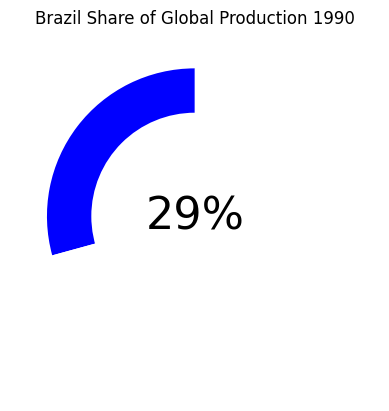

In [81]:
fig,ax = plt.subplots()
ax.pie(
    brazil_vs_all['1990'],
    startangle=90,
    colors=['blue','white']
)
hole = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(hole)
plt.text(
    0, 
    0, 
    "29%", 
    ha='center', 
    va='center', 
    fontsize=32
)
ax.set_title('Brazil Share of Global Production 1990')

Text(0.5, 1.0, 'Brazil Share of Global Production 2018')

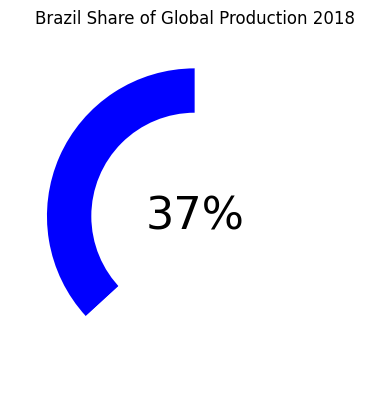

In [82]:
fig,ax = plt.subplots()
ax.pie(
    brazil_vs_all['2018'],
    startangle=90,
    colors=['blue','white']
)
hole = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(hole)
plt.text(
    0, 
    0, 
    "37%", 
    ha='center', 
    va='center', 
    fontsize=32
)
ax.set_title('Brazil Share of Global Production 2018')

# Coffee Consumption Vs. Prices

Compare coffee prices with coffee consumption in the following countries. 

Is there a relationship between coffee consumption and the price these countries pay?

Plot a dual axis bar chart of price vs consumption totals for these countries.

In [83]:
consumption = pd.read_csv("../data/coffee/imports.csv").set_index(['imports']).T.mean()


consumption.head()

imports
   Austria               1551.083333
   Belgium               4639.533333
   Belgium/Luxembourg    2329.444444
   Bulgaria               397.250000
   Croatia                349.136364
dtype: float64

In [84]:
prices = pd.read_csv("../data/coffee/retail-prices.csv")

prices.head()

,retail_prices,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Austria,10.816777,10.088300,11.015453,10.971302,10.110375,11.434879,11.964680,9.646799,8.763797,...,15.342163,14.768212,18.366446,18.498896,19.028698,19.050773,16.423841,12.450331,13.730684,14.635762
1,Cyprus,6.247241,6.181015,6.335541,5.739514,7.019868,9.403974,9.116998,8.918322,10.176600,...,12.207506,11.501104,13.377483,14.039735,14.282561,14.304636,11.699779,11.699779,12.141280,12.781457
2,Denmark,8.410596,8.101545,8.366446,7.682119,9.823400,12.295806,10.618102,10.949227,10.860927,...,11.677704,12.008830,15.275938,14.834437,14.039735,14.194260,12.913907,10.905077,11.103753,11.699779
3,Finland,6.578366,6.004415,5.430464,4.282561,6.026490,8.763797,7.108168,7.726269,7.549669,...,7.748344,8.145695,11.832230,10.596026,9.470199,9.514349,8.609272,8.101545,9.050773,9.359823
4,France,8.233996,7.571744,5.099338,4.481236,5.298013,8.145695,7.284768,6.092715,6.136865,...,8.366446,7.991170,9.116998,8.653422,8.653422,8.322296,6.865342,7.196468,7.505519,8.123620


In [85]:
prices = prices.set_index(["retail_prices"]).T.mean()
prices.head()

retail_prices
   Austria    11.571135
   Cyprus     10.437695
   Denmark    10.494025
   Finland     7.211692
   France      6.850879
dtype: float64

In [86]:
price_cons = prices.reset_index().rename(
    columns={
        'retail_prices':'Country',
        0 : 'Price'
    }
).merge(
    consumption.reset_index().rename(
        columns={
            'imports':'Country',
            0 : 'Price'
        }
    ), on="Country"
).rename(
    columns={
        'Price_x':'Price',
        'Price_y':'Imports'
    }
).sort_values(by='Imports',ascending=False)

In [87]:
price_cons

,Country,Price,Imports
5,Germany,9.515110,16357.666667
11,Japan,21.472939,6862.275235
6,Italy,14.199589,6696.958333
4,France,6.850879,6512.458333
9,Spain,8.029992,4046.291667
7,Netherlands,8.931263,2928.125000
10,Sweden,8.054350,1620.625000
0,Austria,11.571135,1551.083333
3,Finland,7.211692,1157.541667
2,Denmark,10.494025,991.791667


Text(0, 0.5, 'Average price paid per bag (USD)')

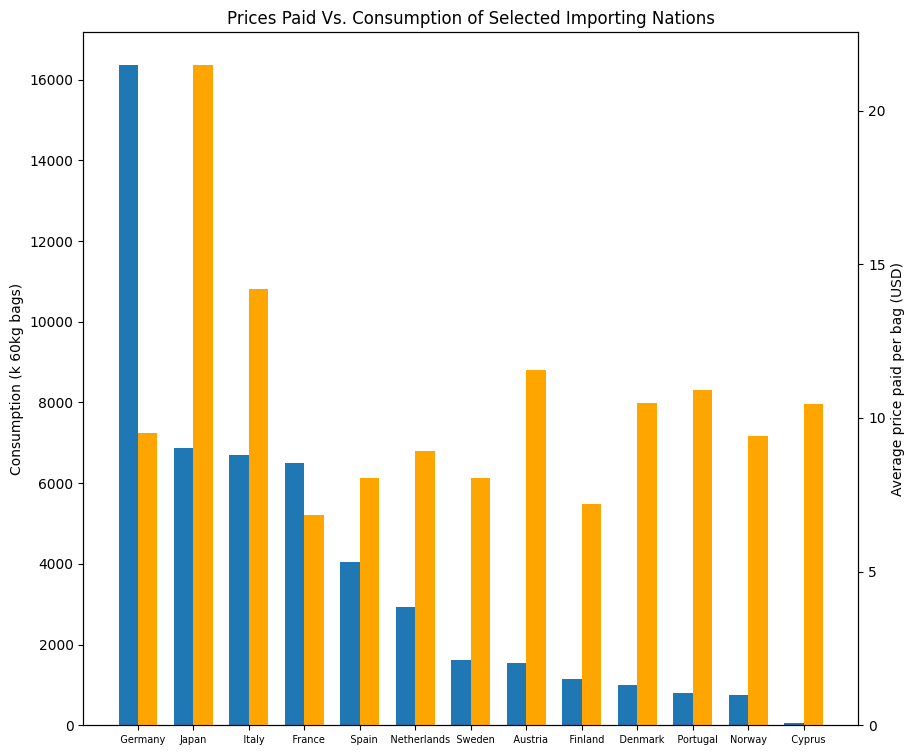

In [88]:
fig , ax = plt.subplots(figsize = (10,9))
width = 0.35
x = np.arange(13)
ax.bar(
    x-width/2,
    price_cons['Imports'],
    label = 'consumption',
    width=0.35
)
ax.set_xticks(x)
ax.set_xticklabels(price_cons.Country,fontsize=7)
ax.set_title("Prices Paid Vs. Consumption of Selected Importing Nations")
ax.set_ylabel("Consumption (k 60kg bags)")

ax2 = ax.twinx()
ax2.bar(
    x+width/2,
    price_cons['Price'],
    label = 'Price',
    color = 'orange',
    width=0.35
)
ax2.set_ylabel("Average price paid per bag (USD)")